### 1. Даны функции для сортировки массивов, которые работают за O(N^2): Пузырек и сортировка выбором, эмпирически определить, какая реализация быстрее и как зависит разница времени исполнения одного и другого от длины входного массива


Как решать:

    1) Генерируем случайный список чисел длины N и его точную копию

    2) Сортируем первый пузырьком, второй - выбором, в обоих случаях засекаем время

    3) Записываем время сортировки при длине N в списки.

    4) Получаем зависимость разницы времени исполнения от длины

    5) Готово, вы восхитительны.

Чтобы повысить точность, для каждого N можно сгенерировать случайный список несколько раз и усреднить время.

In [26]:
def bubble_sort(nums):

    # Устанавливаем swapped в True, чтобы цикл запустился хотя бы один раз
    swapped = True

    while swapped:
        swapped = False

        # Идем циклом по индексам наших элементов
        for i in range(len(nums) - 1):
#             print(nums)
            # Если текущий элемент слева больше своего элемента справа
            if nums[i] > nums[i + 1]:

                # Меняем элементы местами
                nums[i], nums[i + 1] = nums[i + 1], nums[i]

                # Устанавливаем swapped в True для следующей итерации
                swapped = True

                # По окончании первого прогона цикла for
                # самый большой элемент "Всплывет" наверх
                
                
def selection_sort(nums):

    # Значение i соответствует кол-ву отсортированных значений
    for i in range(len(nums)):

        # Исходно считаем наименьшим первый элемент
        lowest_value_index = i

        # Этот цикл перебирает несортированные элементы
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j

        # Самый маленький элемент меняем с первым в списке
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]



In [27]:
import random
import time
import matplotlib.pyplot as plt

def measure_time_sort_list(list_num_for_sort, sort_method):
   '''
   Функция получает на вход список для сортировки и метод сортировки
   возвращает время сортировки
   '''
   start_time = time.time() # время начала выполнения
   sort_method(list_num_for_sort) # сортировка
   end_time = time.time() # время окончания выполнения
   execution_time = end_time - start_time # время выполнения сортировки
   return round(execution_time, 5)

In [28]:
# Определение среднего времени сортровки (выполняется около 8 сек)
list_bubble = list()
list_selection = list()
for i in range(100):
    '''
    В цикле 100 раз создается список длиной 1000 и вычисляется время сортировки
    '''
    random_for_bubble = random.sample(range(10000), 1000)
    random_for_selection = random_for_bubble.copy()
    list_bubble.append(measure_time_sort_list(random_for_bubble, bubble_sort))
    list_selection.append(measure_time_sort_list(random_for_selection, selection_sort))
    
print(f'Среднее время сортировки ПУЗЫРЬКОМ: {sum(list_bubble)/len(list_bubble)} сек.')
print(f'Среднее время сортировки ВЫБОРОМ: {sum(list_selection)/len(list_selection)} сек.')

Среднее время сортировки ПУЗЫРЬКОМ: 0.06344219999999998 сек.
Среднее время сортировки ВЫБОРОМ: 0.017703199999999995 сек.


In [29]:
# списки времени выполнения сортировки (выполняется около 22 сек)
list_time_bubble = list()
list_time_selection = list()

range_gen = range(10, 2001, 10) # параметр для создания 200 списков длиной от 10 до 2000
list_len_lists = list(range_gen) # список длин списков

for i in range_gen:
   '''
   В цикле генерируются списки по параметру range_gen со значениями от 0 до 19999,
   значения длин сгенерированных списков, затем вычисляется время сортировки каждым методом
   и передается в соответствующий список
   '''
   random_list_for_bubble = random.sample(range(10000), i)
   random_list_for_selection = random_list_for_bubble.copy()

   list_time_bubble.append(measure_time_sort_list(random_list_for_bubble, bubble_sort))
   list_time_selection.append(measure_time_sort_list(random_list_for_selection, selection_sort))

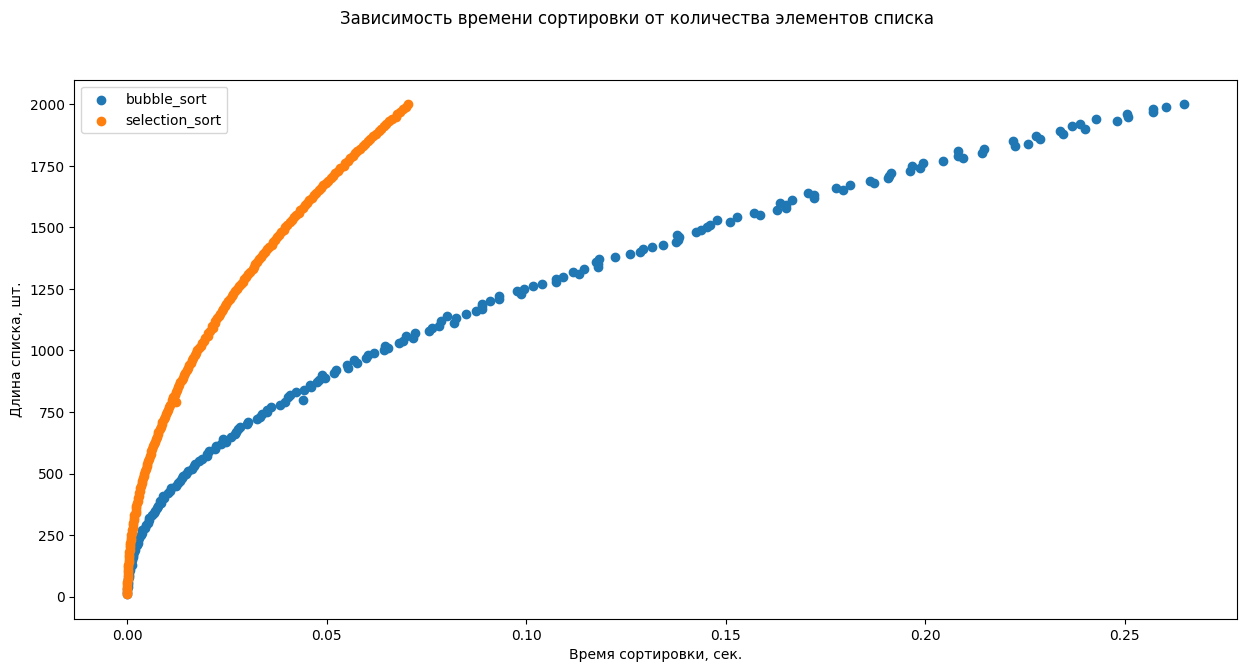

In [47]:
plt.subplots(1, 1, figsize=(15, 7))
plt.suptitle('Зависимость времени сортировки от количества элементов списка')
plt.scatter(list_time_bubble, list_len_lists, label= bubble_sort.__name__)
plt.scatter(list_time_selection, list_len_lists, label= selection_sort.__name__)
plt.ylabel('Длина списка, шт.')
plt.xlabel('Время сортировки, сек.')
plt.legend();

### 2. [Алгоритм имитации отжига](https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/)

Прочтите статью про алгоритм имитации отжига (я сдернул информацию по ссылке), это простейший не-градиентный алгоритм оптимизации функций(поиска экстремума)


**Задание 1**

Проверьте, как зависит скорость сходимости алгоритма для целевой функии вида $y = x^2$ от:

1) начальной температуры

2) размера шага алгоритма (попробуйте подомножать результаты randn на число и заменить нормальное распределение на равномерное)


**Задание 2**

Попробовать желательно, но не обязательно.

Модифицируйте алгоритм так чтобы он работал для квадратичной функции от двух переменных $x^2 + y^2$ и , если возможно, от n переменных.

In [20]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x):
    return x[0]**2.0

def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    # generate an initial point
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    scores = list()
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + randn(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            scores.append(best_eval)
            # report progress
            print('>%d f(%s) = %.5f' % (i, best, best_eval))
            # difference between candidate and current point evaluation
            diff = candidate_eval - curr_eval
            # calculate temperature for current epoch
            t = temp / float(i + 1)
            # calculate metropolis acceptance criterion
            metropolis = exp(-diff / t)
            # check if we should keep the new point
            if diff < 0 or rand() < metropolis:
                # store the new current point
                curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores]

>5 f([-0.71624542]) = 0.51301
>7 f([-0.65250924]) = 0.42577
>9 f([-0.47524847]) = 0.22586
>11 f([-0.45712705]) = 0.20897
>12 f([-0.40069256]) = 0.16055
>14 f([-0.327695]) = 0.10738
>15 f([-0.29039562]) = 0.08433
>16 f([-0.23701453]) = 0.05618
>18 f([-0.04563249]) = 0.00208
>19 f([-0.01255278]) = 0.00016
>25 f([0.00329871]) = 0.00001
>32 f([-0.00295045]) = 0.00001
>47 f([-0.00066185]) = 0.00000
>79 f([0.00065104]) = 0.00000
>251 f([0.00032916]) = 0.00000
>440 f([-0.00030124]) = 0.00000
Done!
f([-0.00030124]) = 0.000000


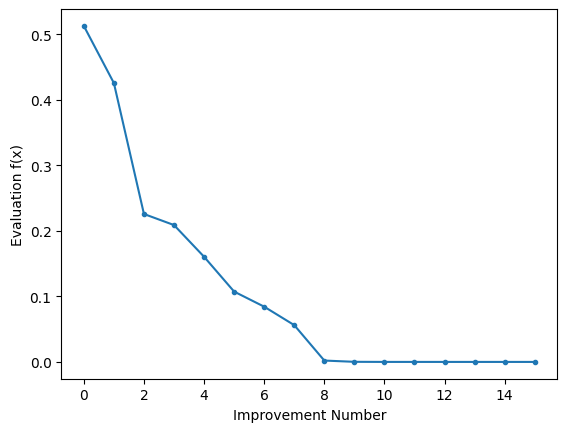

In [77]:
# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

plt.plot(scores, '.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')
plt.show()

### 3. Подсчет слов
Давайте теперь поработаем с настоящим файлом и действительно посчитаем в нем слова. Мы загрузим метаданные почтового сервера университета Мичигана. И попробуем **найти, с какого адреса ушло больше всего писем.**

In [7]:
# импортируем библиотеку для доступа к файлам в интернете
import requests
# в переменной mbox хранится текст для работы
mbox = requests.get('http://www.py4inf.com/code/mbox.txt').text

### 4. Напишите функцию, которая переводит число, записанное римскими цифрами, в десятичное

Символы для римских цифр:

    I             1
    V             5
    X             10
    L             50
    C             100
    D             500
    M             1000


Например, 2 записывается как II .

12 записывается как XII, что просто X + II.

Число 27 записывается как XXVII, что равно XX + V + II.

Римские цифры обычно записываются от большего к меньшему слева направо. Однако символы для 4 не IIII. Вместо этого число четыре записывается как IV, потому что если I стоит перед V, мы "вычитаем его", получая тем самым четыре. Тот же принцип работает и для числа девять, которое записывается как IX. Существует шесть случаев, когда используется вычитание:

    I может быть помещен перед V (5) и X (10) для получения 4 и 9.
    X может быть помещен перед L (50) и C (100) для получения 40 и 90.
    C может быть помещен перед D (500) и M (1000), чтобы получить 400 и 900.

In [8]:
def rewrite_roman_num(input_roman_num):
    '''
    функция получает на вход римское число в виде строки
    возвращает десятичное число типа int
    '''
    roma_nums = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    last_num = input_roman_num[-1]
    dec_num = roma_nums[last_num]\

    for i in input_roman_num[-2::-1]:
        if roma_nums[i] >= roma_nums[last_num]:
            dec_num += roma_nums[i]
        else:
            dec_num -= roma_nums[i]
            last_num = i
    return dec_num

rewrite_roman_num('XXVII')

27

### 5. Напишите декоратор, который сначала выводит на печать имя вызываемой функции, затем делает паузу в 3 секунды, а затем вызывает функцию

(Про имя вызываемой функции можно глянуть в лекции - там один из декораторов такое делал)

In [9]:
def debug_decorator(func):
    def wrapper(*args):
        print("- Имя вызываемой функции:", func.__name__)
        print('- Пауза 3 секунды...')
        time.sleep(3)
        result = func(*args)
        print("- Результат вызываемой функции:", result)
    return wrapper

In [10]:
@debug_decorator
def rewrite_roman_num(input_num):
    '''
    функция получает на вход римское число в виде строки
    возвращает десятичное число типа int
    '''
    roma_nums = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    last_num = input_num[-1]
    dec_num = roma_nums[last_num]
    for i in input_num[-2::-1]:
        if roma_nums[i] >= roma_nums[last_num]:
            dec_num += roma_nums[i]
        else:
            dec_num -= roma_nums[i]
            last_num = i
    return dec_num

rewrite_roman_num('XXVII')

- Имя вызываемой функции: rewrite_roman_num
- Пауза 3 секунды...
- Результат вызываемой функции: 27


### 6. Функции ошибок

В целом, машинное обучение часто сводится к минимизации какого-то функционала ошибки. Ваш алгоритм на обучающей выборке возвращает список предсказаний, который вы с помощью какого-то функционала сравниваете с правильными ответами и получаете некое значение (ошибку), которую нужно минимизировать. В этом задании необходимо реализовать ряд функционалов ошибок.


## Пример - MSE

In [11]:
from typing import List
import sys
import math

def mse(prediction:List[float], 
        actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеквадратичную ошибку
    '''
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mse = sum((prediction[i] - actual_values[i])**2 for i in range(N))/N
    
    return mse

In [12]:
a = [1,2,3,4,5]
b = [1,2,3,10,6]

mse(a,b) == (6**2 + 1)/5

True

Аналогичным образом реализуйте следующий список функций ошибок:

    RMSE, LogLoss, HueberLoss, MAE, MAPE, sMAPE, log-cosh loss, quantile loss  :) 

Вопросы можно задавать

In [13]:
def rmse(prediction:List[float],
         actual_values:List[float]) -> float:
        '''
        На вход приходят два списка равной длины
        На выходе мы получаем корень среднеквадратичной ошибки
        '''
        assert len(prediction) == len(actual_values)
        N = len(prediction)
        rmse = (sum((actual_values[i] - prediction[i]) ** 2 for i in range(N)) / N) ** (1/2)
        return rmse

rmse(a, b)

2.7202941017470885

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(b, a) ** (1/2) == rmse(a, b)

True

In [15]:
def logloss(prediction_proba:List[float],
            actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины\n",
    На выходе мы получаем логарифмическую ошибку бинарной классификации объектов I класса\n",
    '''
    assert len(prediction_proba) == len(actual_values)
    N = len(prediction_proba)
    logloss_value = (sum(-1 * (actual_values[i] * math.log(prediction_proba[i][1]) + (1 - actual_values[i]) * math.log(1 - prediction_proba[i][1])) for i in range(N)) / N)
    return logloss_value

a_class = [1, 0, 0, 1]
a_proba = [[.1, .9], [.9, .1], [.8, .2], [.35, .65]]
logloss(a_proba, a_class)

0.21616187468057912

In [16]:
from sklearn.metrics import log_loss
logloss(a_proba, a_class) == log_loss(a_class, a_proba)

True

In [17]:
def hueber_loss(prediction:List[float],
                actual_values:List[float], delta= 1) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем ошибку Хьюбера при границе разделения равной 1
    * Обычно выводят массив ошибок, но конкретно для этого задания я вывел среднюю ошибок Хьюбера для наглядности
    '''
    assert len(prediction) == len(actual_values)
    N = len(prediction)
    hueber_loss_list = []
    for i in range(N):
        if abs(actual_values[i] - prediction[i]) <= delta:
            hueber_loss_list.append(0.5 * (actual_values[i] - prediction[i]) ** 2)
        else:
            hueber_loss_list.append(delta * abs(actual_values[i] - prediction[i]) - (0.5 * delta ** 2))
    return sum(hueber_loss_list) / N

hueber_loss(b, a)

1.2

In [18]:
def mae(prediction:List[float],
        actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеабсолютную ошибку
    '''
    assert len(prediction) == len(actual_values)
    N = len(prediction)
    mae = (sum(abs(prediction[i] - actual_values[i]) for i in range(N)) / N)
    return mae

mae(a, b)

1.4

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(a, b) == mae(a, b)

True

In [20]:
def mape(prediction:List[float],
         actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеабсолютную процентную ошибку
    Если в actual_values есть 0, они заменяются на epsilon
    '''
    assert len(prediction) == len(actual_values)
    actual_values = list(map(lambda x: sys.float_info.epsilon if x == 0 else x, actual_values))
    N = len(prediction)
    mape = sum(abs((prediction[i] - actual_values[i]) / actual_values[i]) for i in range(N)) * (100 / N)
    return mape

mape(a, b)

15.333333333333332

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(b, a) * 100 == mape(a, b)

True

In [22]:
def smape(prediction:List[float],
          actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины\n",
    На выходе мы получаем симметрическую среднеабсолютную процентную ошибку от 0% до 100%\n",
    Случай, когда оба элемента списков равны нулю, не учитывается в расчетах, но выводится предупреждение\n",
    '''
    assert len(prediction) == len(actual_values)
    smape = 0
    N = len(prediction)
    for i in range(N):
        if (prediction[i] == 0) and (actual_values[i] == 0):
            print('Найден неопределенный случай')
        else:
            smape += abs(prediction[i] - actual_values[i]) / (abs(actual_values[i]) + abs(prediction[i]))
    return smape * (100 / N)

smape(a, b)

10.38961038961039

In [23]:
import numpy as np
# реализация smape из stackoverflow
def smape_st_ov(A, F):
     return 100/len(A) * np.sum(np.abs(F - A) / (np.abs(A) + np.abs(F)))

smape_st_ov(np.array(b), np.array(a)) == smape(a, b)

True

In [24]:
def log_cosh_loss(prediction:List[float],
                  actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем средний логарифм гиперболического косинуса ошибки 
    '''
    assert len(prediction) == len(actual_values)
    log_cosh_value = 0
    N = len(prediction)
    for i in range(N):
        log_cosh_value += abs(math.log(math.cosh(actual_values[i] - prediction[i])))
    return log_cosh_value

log_cosh_loss(a, b)

5.740639794116559

In [25]:
def quantile_loss(prediction:List[float],
                  actual_values:List[float], q=0.5) -> float:
    '''
    На вход приходят два списка равной длины,
    На выходе мы получаем среднюю квантильную ошибку,
    '''
    assert len(prediction) == len(actual_values)
    quantile_loss = 0
    N = len(prediction)
    for i in range(N):
        if actual_values[i] - prediction[i] >= 0:
            quantile_loss += q * (actual_values[i] - prediction[i])
        else:
            quantile_loss += (1 - q) * (prediction[i] - actual_values[i])
    return quantile_loss / N

quantile_loss(a, b)

0.7